In [1]:

# imports
import os
import sys
import types
import json
import base64

# figure size/format
fig_width = 10
fig_height = 5
fig_format = 'retina'
fig_dpi = 96
interactivity = ''
is_shiny = False
is_dashboard = False
plotly_connected = True

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = "figure"
  from IPython.display import set_matplotlib_formats
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  if plotly_connected:
    pio.renderers.default = "notebook_connected"
  else:
    pio.renderers.default = "notebook"
  for template in pio.templates.keys():
    pio.templates[template].layout.margin = dict(t=30,r=0,b=0,l=0)
except Exception:
  pass

# disable itables paging for dashboards
if is_dashboard:
  try:
    from itables import options
    options.dom = 'fiBrtlp'
    options.maxBytes = 1024 * 1024
    options.language = dict(info = "Showing _TOTAL_ entries")
    options.classes = "display nowrap compact"
    options.paging = False
    options.searching = True
    options.ordering = True
    options.info = True
    options.lengthChange = False
    options.autoWidth = False
    options.responsive = True
    options.keys = True
    options.buttons = []
  except Exception:
    pass
  
  try:
    import altair as alt
    # By default, dashboards will have container sized
    # vega visualizations which allows them to flow reasonably
    theme_sentinel = '_quarto-dashboard-internal'
    def make_theme(name):
        nonTheme = alt.themes._plugins[name]    
        def patch_theme(*args, **kwargs):
            existingTheme = nonTheme()
            if 'height' not in existingTheme:
              existingTheme['height'] = 'container'
            if 'width' not in existingTheme:
              existingTheme['width'] = 'container'

            if 'config' not in existingTheme:
              existingTheme['config'] = dict()
            
            # Configure the default font sizes
            title_font_size = 15
            header_font_size = 13
            axis_font_size = 12
            legend_font_size = 12
            mark_font_size = 12
            tooltip = False

            config = existingTheme['config']

            # The Axis
            if 'axis' not in config:
              config['axis'] = dict()
            axis = config['axis']
            if 'labelFontSize' not in axis:
              axis['labelFontSize'] = axis_font_size
            if 'titleFontSize' not in axis:
              axis['titleFontSize'] = axis_font_size  

            # The legend
            if 'legend' not in config:
              config['legend'] = dict()
            legend = config['legend']
            if 'labelFontSize' not in legend:
              legend['labelFontSize'] = legend_font_size
            if 'titleFontSize' not in legend:
              legend['titleFontSize'] = legend_font_size  

            # The header
            if 'header' not in config:
              config['header'] = dict()
            header = config['header']
            if 'labelFontSize' not in header:
              header['labelFontSize'] = header_font_size
            if 'titleFontSize' not in header:
              header['titleFontSize'] = header_font_size    

            # Title
            if 'title' not in config:
              config['title'] = dict()
            title = config['title']
            if 'fontSize' not in title:
              title['fontSize'] = title_font_size

            # Marks
            if 'mark' not in config:
              config['mark'] = dict()
            mark = config['mark']
            if 'fontSize' not in mark:
              mark['fontSize'] = mark_font_size

            # Mark tooltips
            if tooltip and 'tooltip' not in mark:
              mark['tooltip'] = dict(content="encoding")

            return existingTheme
            
        return patch_theme

    # We can only do this once per session
    if theme_sentinel not in alt.themes.names():
      for name in alt.themes.names():
        alt.themes.register(name, make_theme(name))
      
      # register a sentinel theme so we only do this once
      alt.themes.register(theme_sentinel, make_theme('default'))
      alt.themes.enable('default')

  except Exception:
    pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass

# interactivity
if interactivity:
  from IPython.core.interactiveshell import InteractiveShell
  InteractiveShell.ast_node_interactivity = interactivity

# NOTE: the kernel_deps code is repeated in the cleanup.py file
# (we can't easily share this code b/c of the way it is run).
# If you edit this code also edit the same code in cleanup.py!

# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
run_path = 'L1VzZXJzL2pwai9MaWJyYXJ5L0Nsb3VkU3RvcmFnZS9Ecm9wYm94L2d0b3duLzIwMjQtc3VtbWVyL2RhdGEtZXRoaWNzLXVrcmFpbmU='
if run_path:
  # hex-decode the path
  run_path = base64.b64decode(run_path.encode("utf-8")).decode("utf-8")
  os.chdir(run_path)

# reset state
%reset

# shiny
# Checking for shiny by using False directly because we're after the %reset. We don't want
# to set a variable that stays in global scope.
if False:
  try:
    import htmltools as _htmltools
    import ast as _ast

    _htmltools.html_dependency_render_mode = "json"

    # This decorator will be added to all function definitions
    def _display_if_has_repr_html(x):
      try:
        # IPython 7.14 preferred import
        from IPython.display import display, HTML
      except:
        from IPython.core.display import display, HTML

      if hasattr(x, '_repr_html_'):
        display(HTML(x._repr_html_()))
      return x

    # ideally we would undo the call to ast_transformers.append
    # at the end of this block whenver an error occurs, we do 
    # this for now as it will only be a problem if the user 
    # switches from shiny to not-shiny mode (and even then likely
    # won't matter)
    import builtins
    builtins._display_if_has_repr_html = _display_if_has_repr_html

    class _FunctionDefReprHtml(_ast.NodeTransformer):
      def visit_FunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

      def visit_AsyncFunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

    ip = get_ipython()
    ip.ast_transformers.append(_FunctionDefReprHtml())

  except:
    pass

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v

  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define
# globals()["__spec__"] = None

/var/folders/n2/m7_fj5vx6c50_yj7g23mwmq00000gn/T/ipykernel_84060/3395756799.py:25: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats(fig_format)


{"/Users/jpj/.pyenv/versions/3.11.5/lib/python3.11/importlib/_bootstrap.py": 1694574412.6564615, "/Users/jpj/.pyenv/versions/3.11.5/lib/python3.11/importlib/_bootstrap_external.py": 1694574412.6611667, "/Users/jpj/.pyenv/versions/3.11.5/lib/python3.11/zipimport.py": 1694574410.7775924, "/Users/jpj/.pyenv/versions/3.11.5/lib/python3.11/codecs.py": 1694574410.2208612, "/Users/jpj/.pyenv/versions/3.11.5/lib/python3.11/encodings/aliases.py": 1694574411.6929739, "/Users/jpj/.pyenv/versions/3.11.5/lib/python3.11/encodings/__init__.py": 1694574411.687787, "/Users/jpj/.pyenv/versions/3.11.5/lib/python3.11/encodings/utf_8.py": 1694574412.1652963, "/Users/jpj/.pyenv/versions/3.11.5/lib/python3.11/abc.py": 1694574410.153477, "/Users/jpj/.pyenv/versions/3.11.5/lib/python3.11/io.py": 1694574410.3361063, "/Users/jpj/.pyenv/versions/3.11.5/lib/python3.11/stat.py": 1694574410.6048596, "/Users/jpj/.pyenv/versions/3.11.5/lib/python3.11/_collections_abc.py": 1694574410.109986, "/Users/jpj/.pyenv/versions

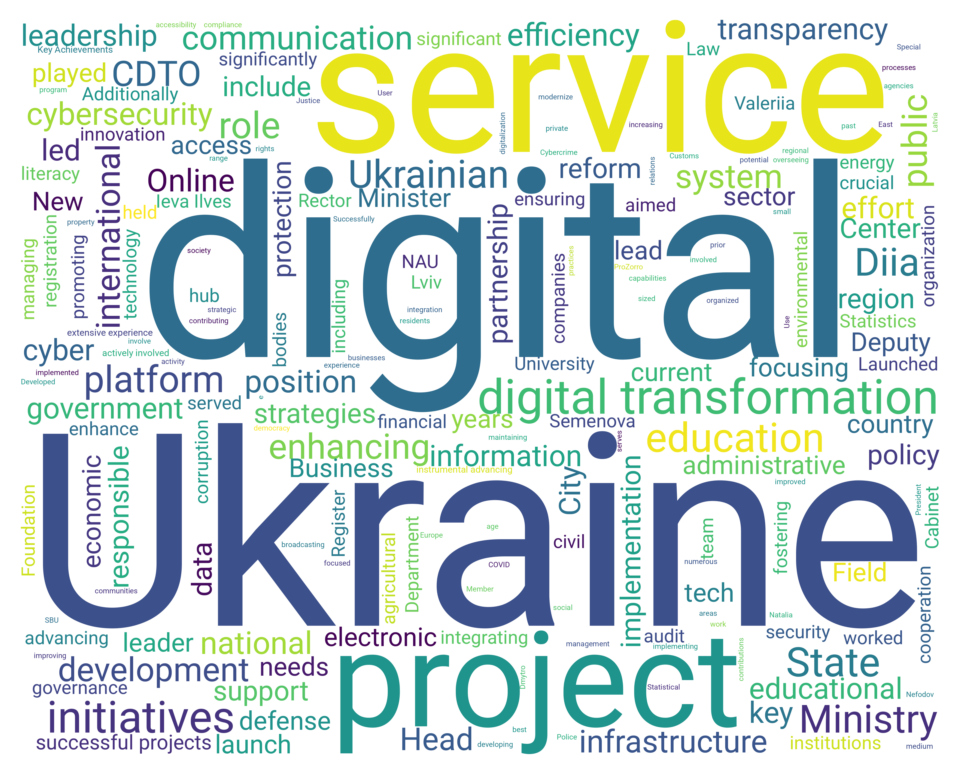

In [2]:
#| label: orig-wordcloud
#| fig-align: center
import spacy
nlp = {
  'en': spacy.load("en_core_web_sm"),
  'uk': spacy.load("uk_core_news_sm")
}
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
portfolio_df = pd.read_csv("Student_portfolios.csv")
portfolio_df = portfolio_df[~pd.isna(portfolio_df['Bio'])].copy()
bio_list_en = list(portfolio_df['Bio'].values)
# Preprocess bios individually
def clean_bio(raw_bio_str, lang):
  lang_nlp = nlp[lang]
  bio_doc = lang_nlp(raw_bio_str)
  bio_tokens = [t.text for t in bio_doc if not t.is_stop]
  bio_sent = " ".join(bio_tokens)
  return bio_sent
def clean_bios(raw_bio_list, lang):
  cleaned_sents = []
  for cur_bio in raw_bio_list:
    bio_sent = clean_bio(cur_bio, lang)
    cleaned_sents.append(bio_sent)
  return cleaned_sents
cleaned_bio_list_en = clean_bios(bio_list_en, 'en')
def combine_bios(bio_list):
  bio_str = "\n".join(bio_list)
  return bio_str
bio_str_en = combine_bios(cleaned_bio_list_en)
wc_options = {
  'background_color': 'white',
  'font_path': 'assets/Roboto.ttf',
  'scale': 8,
  'random_state': 2024,
  'width': 500,
  'height': 400,
}
def display_wordcloud(text_str):
  cloud = WordCloud(**wc_options)
  cloud.generate(text_str)
  plt.imshow(cloud, interpolation='bilinear')
  plt.axis("off")
display_wordcloud(bio_str_en)

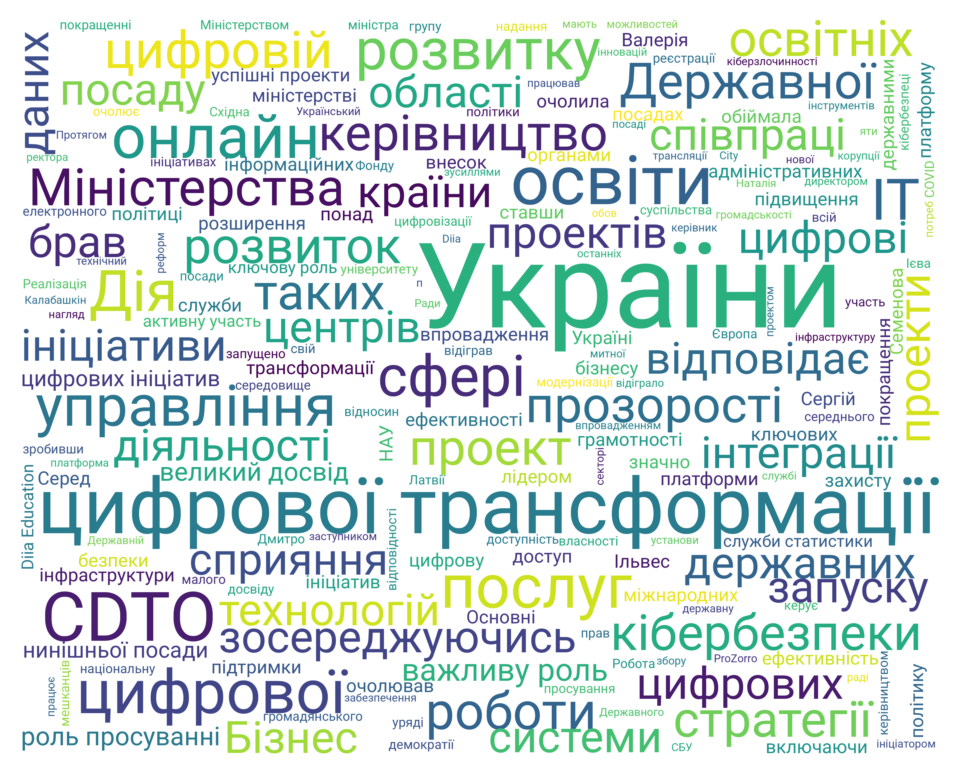

In [3]:
#| label: orig-wordcloud-uk
#| fig-align: center
bio_list_uk = list(portfolio_df['Bio_uk'].values)
cleaned_bio_list_uk = clean_bios(bio_list_uk, 'uk')
bio_str_uk = combine_bios(cleaned_bio_list_uk)
display_wordcloud(bio_str_uk)

In [4]:
#| label: jeff-bio-en
jj_sent_en = "Jeff teaches Data Ethics at Georgetown University."
jj_bio_en = " ".join([jj_sent_en] * 100)
print(jj_bio_en[:230] + "...")

Jeff teaches Data Ethics at Georgetown University. Jeff teaches Data Ethics at Georgetown University. Jeff teaches Data Ethics at Georgetown University. Jeff teaches Data Ethics at Georgetown University. Jeff teaches Data Ethics a...


(-0.5, 3999.5, 3199.5, -0.5)

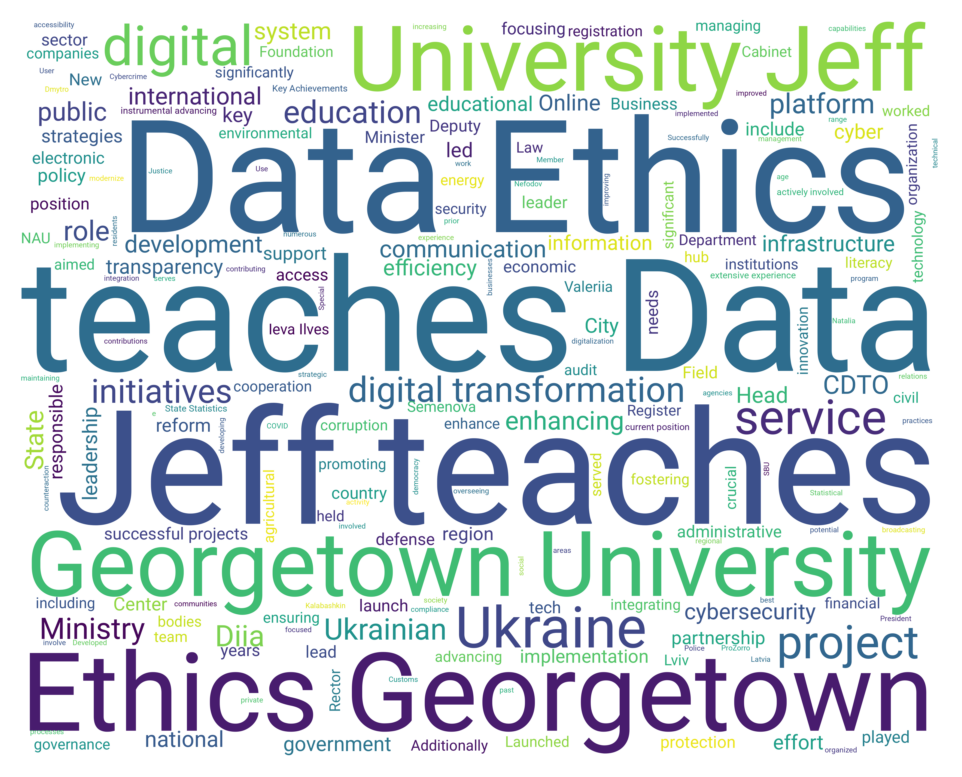

In [5]:
#| label: wordcloud-jeff-bio-en
#| fig-align: center
bio_list_fake_en = cleaned_bio_list_en.copy()
cleaned_jj_bio_en = clean_bio(jj_bio_en, 'en')
bio_list_fake_en.append(cleaned_jj_bio_en)
bio_str_fake_en = combine_bios(bio_list_fake_en)
bio_cloud_fake_en = WordCloud(**wc_options)
bio_cloud_fake_en.generate(bio_str_fake_en)
plt.imshow(bio_cloud_fake_en, interpolation='bilinear')
plt.axis("off")

In [6]:
#| label: jeff-bio-uk
jj_sent_uk = "Джеф викладає етику даних у Джорджтаунському університеті."
jj_bio_uk = " ".join([jj_sent_uk] * 100)
print(jj_bio_uk[:200] + "...")

Джеф викладає етику даних у Джорджтаунському університеті. Джеф викладає етику даних у Джорджтаунському університеті. Джеф викладає етику даних у Джорджтаунському університеті. Джеф викладає етику дан...


(-0.5, 3999.5, 3199.5, -0.5)

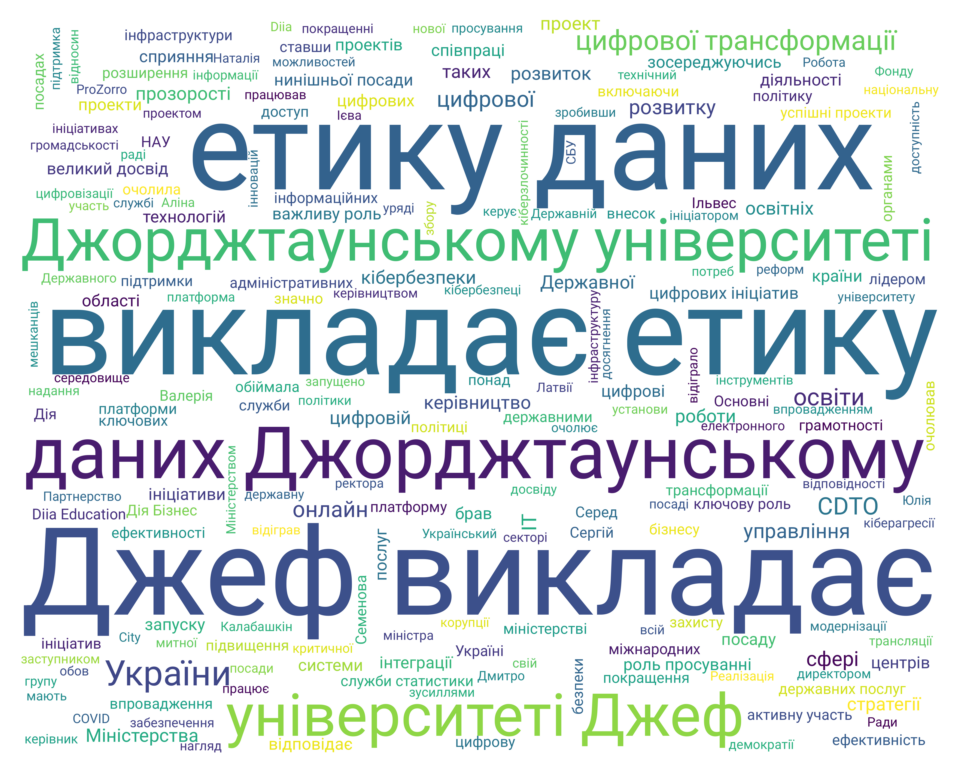

In [7]:
#| label: wordcloud-jeff-bio-uk
#| fig-align: center
bio_list_fake_uk = cleaned_bio_list_uk.copy()
cleaned_jj_bio_uk = clean_bio(jj_bio_uk, 'uk')
bio_list_fake_uk.append(cleaned_jj_bio_uk)
bio_str_fake_uk = combine_bios(bio_list_fake_uk)
bio_cloud_fake_uk = WordCloud(**wc_options)
bio_cloud_fake_uk.generate(bio_str_fake_uk)
plt.imshow(bio_cloud_fake_uk, interpolation='bilinear')
plt.axis("off")

In [8]:
#| label: normalize-freqs-en
# Each bio's freqs should count 1/N in overall
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import normalize
cv_en = CountVectorizer(
  min_df=1,
  # stop_words='english'
)
dtm_en_sparse = cv_en.fit_transform(bio_list_fake_en)
dtm_en = dtm_en_sparse.todense()
#print(dtm.shape)
row_sums_en = dtm_en.sum(axis=1)
#print(row_sums.shape)
dtm_r0_en = dtm_en[0,:]
r0_sum_en = dtm_r0_en.sum()
r0_norm_en = dtm_r0_en / r0_sum_en
# Now use `normalize()`
dtm_norm_en = normalize(np.asarray(dtm_en), axis=1, norm='l1')
# And compute col sums of normalized DTM
dtm_colsums_en = dtm_norm_en.sum(axis=0)
# And combine with the words in a df
freq_df_en = pd.DataFrame({
  'term': cv_en.get_feature_names_out(),
  'freq': dtm_colsums_en
})
#freq_df['term'].values

(-0.5, 3999.5, 3199.5, -0.5)

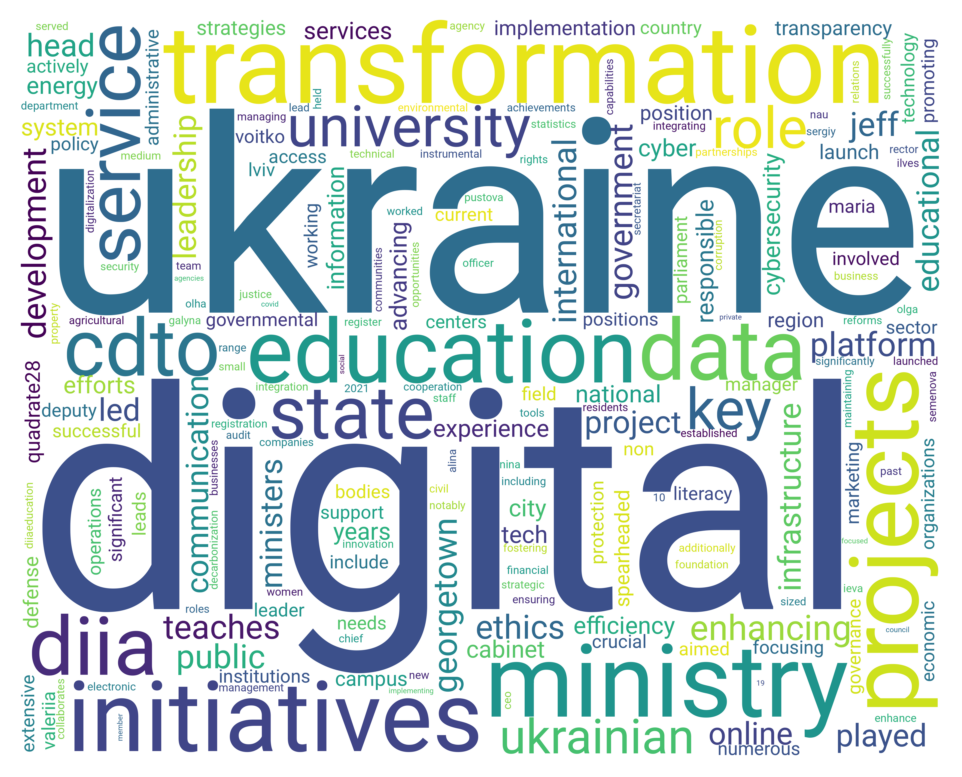

In [9]:
#| label: normalized-wordcloud-en
#| fig-align: center
freq_dict_en = freq_df_en.set_index('term').to_dict(orient='dict')['freq']
bio_cloud_eq_en = WordCloud(**wc_options)
bio_cloud_eq_en.generate_from_frequencies(freq_dict_en)
plt.imshow(bio_cloud_eq_en, interpolation='bilinear')
plt.axis("off")

In [10]:
#| label: normalize-freqs-uk
cv_uk = CountVectorizer(
  min_df=1,
)
dtm_uk_sparse = cv_uk.fit_transform(bio_list_fake_uk)
dtm_uk = dtm_uk_sparse.todense()
#print(dtm.shape)
row_sums_uk = dtm_uk.sum(axis=1)
#print(row_sums.shape)
dtm_r0_uk = dtm_uk[0,:]
r0_sum_uk = dtm_r0_uk.sum()
r0_norm_uk = dtm_r0_uk / r0_sum_uk
# Now use `normalize()`
dtm_norm_uk = normalize(np.asarray(dtm_uk), axis=1, norm='l1')
# And compute col sums of normalized DTM
dtm_colsums_uk = dtm_norm_uk.sum(axis=0)
# And combine with the words in a df
freq_df_uk = pd.DataFrame({
  'term': cv_uk.get_feature_names_out(),
  'freq': dtm_colsums_uk
})
#freq_df['term'].values

(-0.5, 3999.5, 3199.5, -0.5)

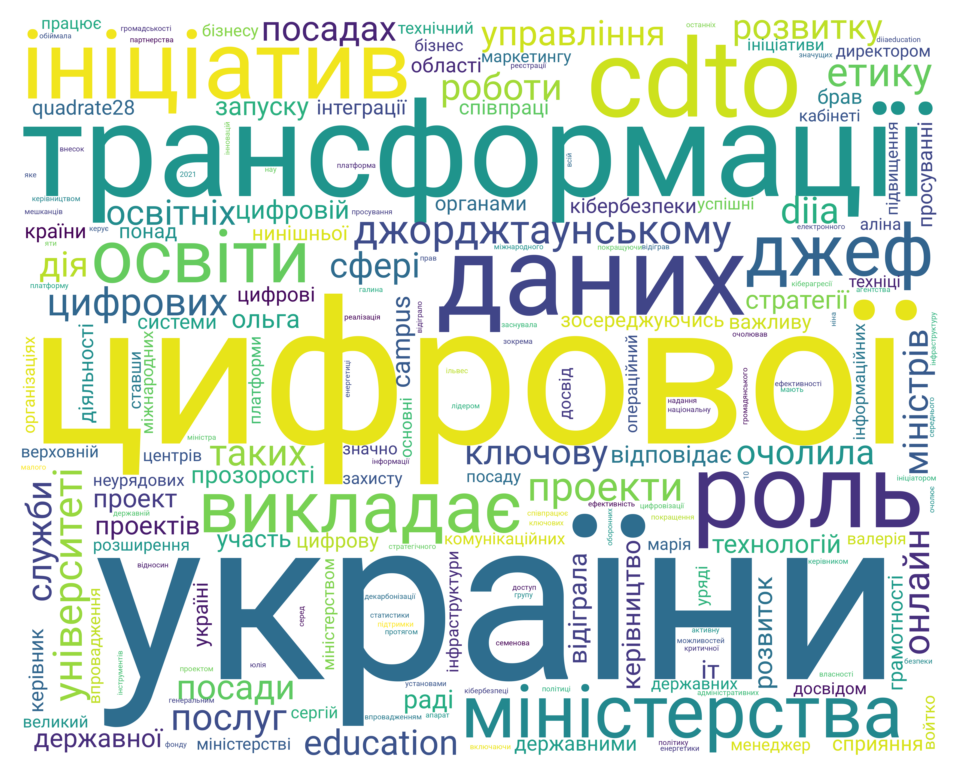

In [11]:
#| label: normalized-wordcloud-uk
#| fig-align: center
freq_dict_uk = freq_df_uk.set_index('term').to_dict(orient='dict')['freq']
bio_cloud_eq_uk = WordCloud(**wc_options)
bio_cloud_eq_uk.generate_from_frequencies(freq_dict_uk)
plt.imshow(bio_cloud_eq_uk, interpolation='bilinear')
plt.axis("off")